**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

#### **<span style="color:red">[데이터 컬럼]</span>**
1. CustomerID: 고객ID
2. gender: 성별
3. SeniorCitizen: 고령자 여부 (1, 0)
4. Partner: 배우자가 있는 지 여부 (Yes, No)
5. Dependents: 부양가족 여부 (Yes, No)
6. Tenure: 서비스 사용 개월수
7. PhoneService: 폰서비스 이용여부 (Yes, No)
8. MultipleLines: 다회선 이용여부 (Yes, No, No phone service)
9. InternetService: 인터넷 서비스 제공업체 (DSL, Fiber optic, No)
10. OnlineSecurity: 온라인 보안 이용여부 (Yes, No, No internet service)
11. OnlineBackup:온라인 백업 이용여부 (Yes, No, No internet service)
12. DeviceProtection: 디바이스 보호 이용여부 (Yes, No, No internet service)
13. TechSupport: 기술지원 이용여부 (Yes, No, No internet service)
14. StreamingTV: 스트리밍TV 이용여부 (Yes, No, No internet service)
15. StreamingMovies: 스트리밍 영화 이용여부 (Yes, No, No internet service)
16. Contract: 접촉 주기 (Month-to-month, One year, Two years)
17. PaperlessBilling: 온라인 빌링 이용여부 (Yes, No)
18. PaymentMethod: 요금납부방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: 월 이용요금
20. TotalCharges: 총 이용요금
21. Churn: 이탈여부 (Yes or No)

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Numpy를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
import pandas as pd
import numpy as np

<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv('/content/drive/MyDrive/미프5/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop(columns=['customerID'])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
print(df1.TotalCharges.dtype)
df2 = df.copy()
df2.TotalCharges = df1.TotalCharges.replace(' ', 0)
df2.TotalCharges = df2.TotalCharges.astype(float)
df2.TotalCharges.value_counts()

object


0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

* 황성업 : 컬럼 타입이 왜 float이 아니고 int64인거죠??!?!?

<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
print(df2.Churn.value_counts())
df3 = df2.copy()
df3.Churn = df2.Churn.replace({'Yes':1, 'No':0})
print(df3.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64
0    5174
1    1869
Name: Churn, dtype: int64


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
removed_cols = df3.columns[df3.isnull().mean() >= 0.4]
print(removed_cols)
df4 = df3.drop(columns=removed_cols)
df4 = df3.dropna()

Index(['DeviceProtection'], dtype='object')


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 1 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3571 non-null   object 
 1   gender            3571 non-null   object 
 2   SeniorCitizen     3571 non-null   float64
 3   Partner           3571 non-null   object 
 4   Dependents        3571 non-null   object 
 5   tenure            3571 non-null   int64  
 6   PhoneService      3571 non-null   object 
 7   MultipleLines     3571 non-null   object 
 8   InternetService   3571 non-null   object 
 9   OnlineSecurity    3571 non-null   object 
 10  OnlineBackup      3571 non-null   object 
 11  DeviceProtection  3571 non-null   object 
 12  TechSupport       3571 non-null   object 
 13  StreamingTV       3571 non-null   object 
 14  StreamingMovies   3571 non-null   object 
 15  Contract          3571 non-null   object 
 16  PaperlessBilling  3571 non-null   object 


<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요.
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

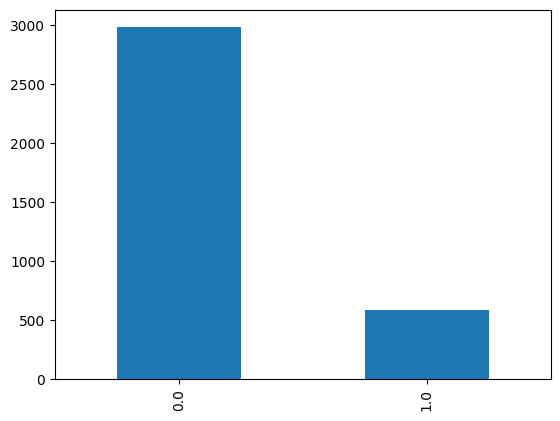

In [ ]:
# 여기에 답안코드를 작성하세요.
import matplotlib.pyplot as plt

df4.SeniorCitizen.value_counts().plot(kind='bar')
plt.show()

df4 = df4.drop(columns=['SeniorCitizen'])

<br>

In [ ]:
df4.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

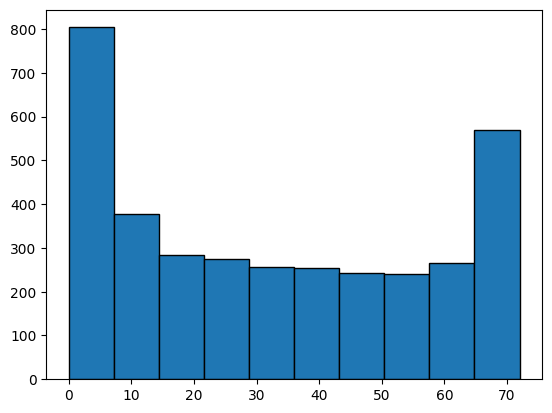

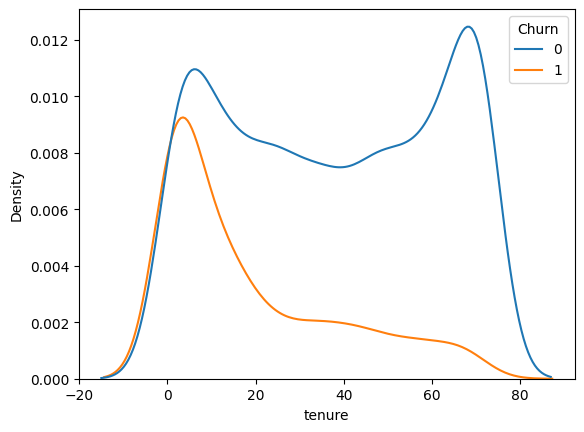

O


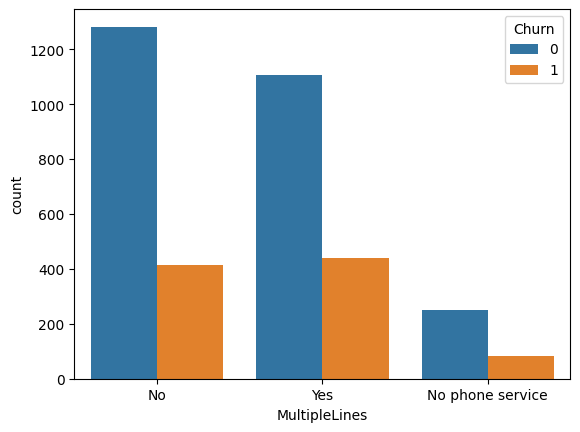

O


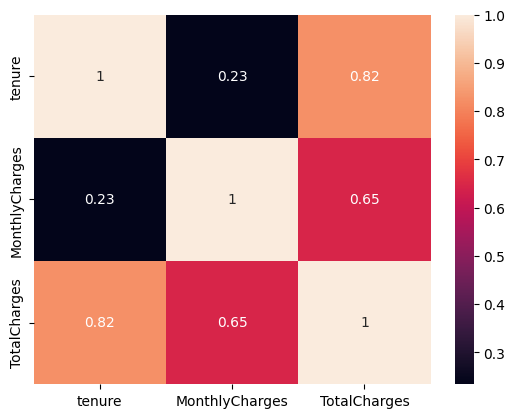

0.8235263575688545

In [ ]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns

plt.figure()
plt.hist(df4.tenure,edgecolor='k')
plt.show()

plt.figure()
sns.kdeplot(data=df4, x='tenure', hue='Churn')
plt.show()

if df4[df4.tenure > df4.tenure.median()].Churn.sum() < df4[df4.tenure <= df4.tenure.median()].Churn.sum():
    print('O')
else:
    print('X')

plt.figure()
sns.countplot(data=df4, x='MultipleLines', hue='Churn')
plt.show()

_, a_Yes = df4[df4['MultipleLines'] == 'Yes']['Churn'].value_counts(normalize=True)
_, b_Yes = df4[df4['MultipleLines'] == 'No']['Churn'].value_counts(normalize=True)
_, c_Yes = df4[df4['MultipleLines'] == 'No phone service']['Churn'].value_counts(normalize=True)

if a_Yes > b_Yes and a_Yes > c_Yes:
    print('O')
else:
    print('X')

plt.figure()
corr = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True)
plt.show()

corr[corr < 1.0].max().max()


* 황성업:

* 황성업 : 이거봐 TotalCharges를 제대로 float으로 안바꾸니까 에러나서 corr() 2*2로 나오잖아요,,,

In [ ]:
df4[df4['MultipleLines'] == 'No phone service']['Churn'].value_counts(normalize=True)

0    0.754545
1    0.245455
Name: Churn, dtype: float64

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
object_cols = df4.select_dtypes(include='object').columns
df5 = pd.get_dummies(df4, columns=object_cols)

<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df5.drop(columns=['Churn'])
y = df5['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

np.shape(X_train), np.shape(X_valid), np.shape(y_train), np.shape(y_valid)

((2856, 7038), (715, 7038), (2856,), (715,))

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요.
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=10, random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=3, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [ ]:
# 여기에 답안코드를 작성하세요.
import xgboost

XGB = xgboost.XGBClassifier(n_estimators=3, random_state=42)
XGB.fit(X_train, y_train)

XGBClassifier(n_estimators=3, random_state=42)

In [ ]:
# 여기에 답안코드를 작성하세요.
import lightgbm

LGB = lightgbm.LGBMClassifier(n_estimators=3, random_state=42)
LGB.fit(X_train, y_train)

LGBMClassifier(n_estimators=3, random_state=42)

### 14. 바로 위 모델의 성능을 평가하려고 합니다.
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요.
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

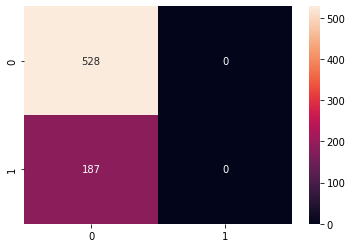

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       528
           1       0.00      0.00      0.00       187

    accuracy                           0.74       715
   macro avg       0.37      0.50      0.42       715
weighted avg       0.55      0.74      0.63       715



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import classification_report, confusion_matrix

y_pred = LGB.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

print(classification_report(y_valid, y_pred))

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
# 여기에 답안코드를 작성하세요.
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=30, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/30
179/179 [==============================] - 5s 25ms/step - loss: 0.5198 - accuracy: 0.7260 - val_loss: 0.4349 - val_accuracy: 0.7804
Epoch 2/30
179/179 [==============================] - 4s 22ms/step - loss: 0.3602 - accuracy: 0.8277 - val_loss: 0.4328 - val_accuracy: 0.7902
Epoch 3/30
179/179 [==============================] - 4s 22ms/step - loss: 0.1091 - accuracy: 0.9681 - val_loss: 0.5408 - val_accuracy: 0.7594
Epoch 4/30
179/179 [==============================] - 4s 21ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.6067 - val_accuracy: 0.7762
Epoch 5/30
179/179 [==============================] - 4s 20ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5358 - val_accuracy: 0.7720
Epoch 6/30
179/179 [==============================] - 4s 20ms/step - loss: 4.1630e-04 - accuracy: 1.0000 - val_loss: 0.5387 - val_accuracy: 0.7594
Epoch 7/30
179/179 [==============================] - 3s 20ms/step - loss: 2.9973e-04 - accuracy: 1.0000 - val_loss: 0.5435 - val_accuracy

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_macc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


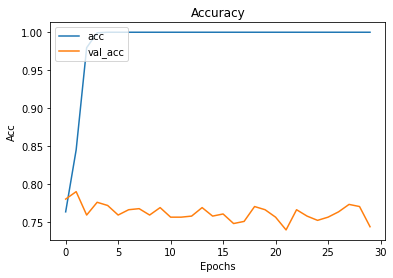

In [ ]:
# 여기에 답안코드를 작성하세요.
print(history.history.keys())

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.

* 황성업 : 왜 안하셨죠? 시간이 남으셨을텐데.. 다음부턴 열심히 해주셨으면 좋겠습니다.